# DBSCAN 군집화 Lab

1. boston 데이터집합에 DBSCAN을 적용해서 군집들을 만드시오. PCA를 통해서 차원을 축소하고 그래프로 그리시오.
단, eps=0.5, min_samples=5으로 하시오
단, 군집화 전에 Min-Max Scaling을 하시오.


In [47]:
#from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [48]:
boston_df = pd.read_csv('../../data/boston_housing.csv')
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [49]:
boston_scaled = MinMaxScaler().fit_transform(boston_df.drop('medv',axis=1))
boston_scaled_df=pd.DataFrame(data=boston_scaled,columns=boston_df.columns[:-1])

In [50]:
boston_scaled_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071


In [51]:
import numpy as np

### Function to visualize clustering results  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter and hasattr(clusterobj, 'cluster_centers_'):
        centers = clusterobj.cluster_centers_
    else:
        iscenter = False
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*','P','D','H','v','>','<']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[0])  #label
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
boston_pca = pca.fit_transform(boston_scaled_df)

boston_df['ftr1'] = boston_pca[:,0]
boston_df['ftr2'] = boston_pca[:,1]

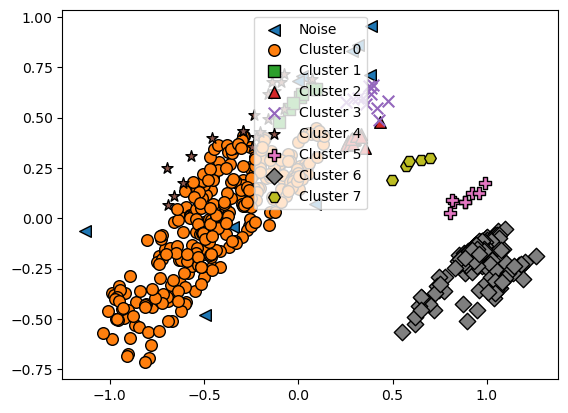

In [60]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(boston_scaled_df)

boston_df['cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, boston_df, 'cluster', iscenter=False)

2. eps=0.7로 변경해서 군집분석을 수행하고 그래프를 그리시오.


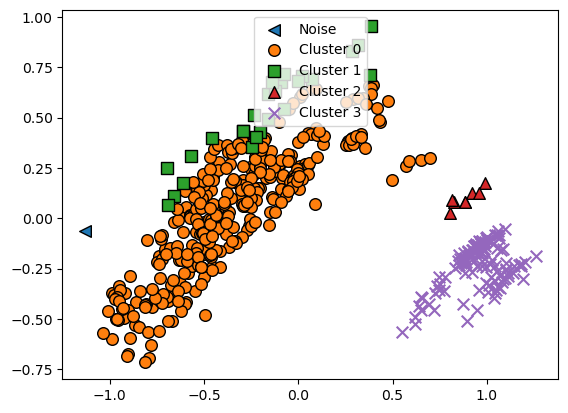

In [61]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=5, metric='euclidean')
dbscan_labels = dbscan.fit_predict(boston_scaled_df)

boston_df['cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, boston_df, 'cluster', iscenter=False)

3. eps=0.5, min_samples=10으로 해서 군집분석을 수행하고 그래프를 그리시오.


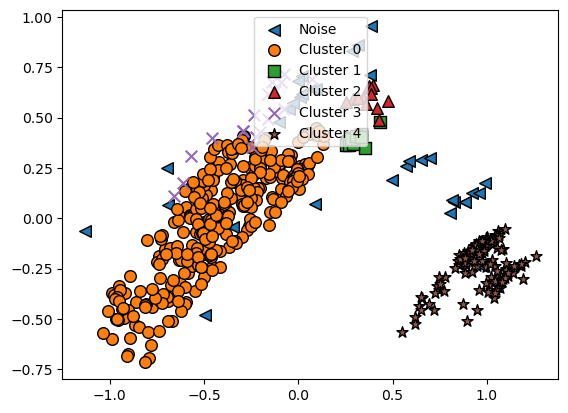

In [62]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

# DBSCAN 군집화 적용
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(boston_scaled_df)

boston_df['cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, boston_df, 'cluster', iscenter=False)

4. eps=0.7, min_samples=10으로 해서 군집분석을 수행하고 그래프를 그리시오.

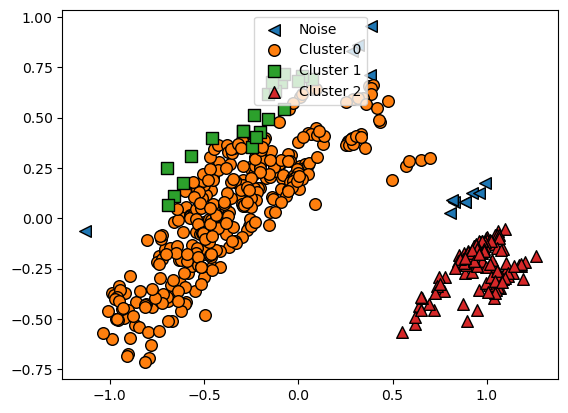

In [63]:
from sklearn.cluster import DBSCAN

# DBSCAN 군집화 적용
dbscan = DBSCAN(eps=0.7, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(boston_scaled_df)

boston_df['cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, boston_df, 'cluster', iscenter=False)